# Wine Quality Prediction Project

## Table of Contents
- [Introduction](#Introduction)
- [Dataset Overview](#Dataset-Overview)
- [Data Preprocessing](#Data-Preprocessing)
- [Model Training](#Model-Training)
- [Model Evaluation](#Model-Evaluation)
- [Feature Importance](#Feature-Importance)
- [Conclusion](#Conclusion)

This project aims to predict the quality of red wine based on its physicochemical properties. The goal is to build a machine learning model that can accurately predict the wine's quality score (ranging from 3 to 8) based on these features. This notebook is designed to be educational, providing clear explanations and visualizations to help both beginners and experienced practitioners understand the process.

## Introduction

Wine quality is typically evaluated by experts, but machine learning can help automate this process by analyzing various chemical properties of wine. This project demonstrates how to build a predictive model using a dataset of red wine samples. The dataset includes features such as:

- Fixed Acidity
- Volatile Acidity
- Citric Acid
- Residual Sugar
- Chlorides
- Free Sulfur Dioxide
- Total Sulfur Dioxide
- Density
- pH
- Sulphates
- Alcohol

The target variable is the quality score, which ranges from 3 (poor quality) to 8 (excellent quality).

## Dataset Overview

### Data Shape and Information
Before diving into analysis, let's understand the structure of our dataset.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Loading the Dataset
We'll start by loading the dataset and displaying some basic information.

In [2]:
# Load the dataset
wine_data = pd.read_csv('winequality-red.csv')

# Display the first few rows of the dataset
print("Data shape: ", wine_data.shape)
print("\nData info: ")
print(wine_data.info())

# Display data description
print("\nData description: \n", wine_data.describe())

# Check for missing values
print("\nMissing values: ", wine_data.isnull().sum())

Data shape:  (1599, 12)

Data info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

Data description: 
        fixed acidity  volatile acidity  citric acid  residual s

### Understanding the Target Variable
Let's visualize the distribution of the target variable (wine quality) to understand how the data is distributed.

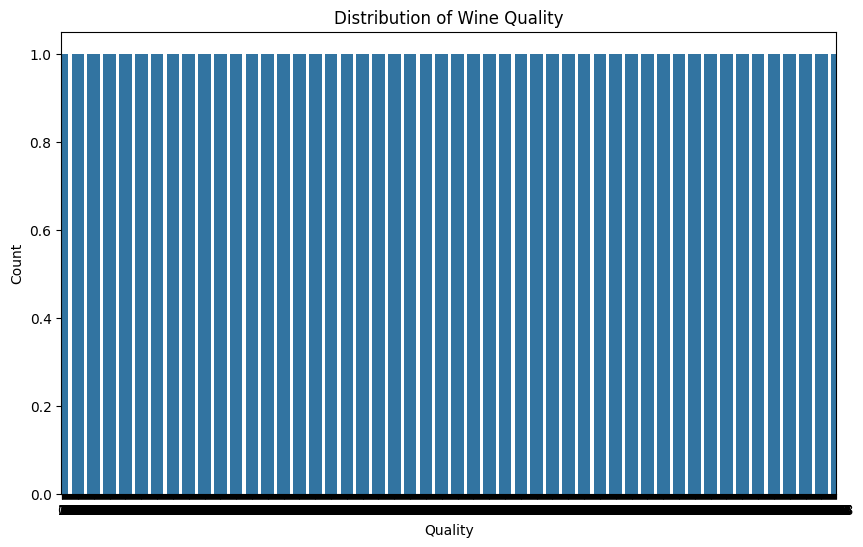

In [3]:
# Visualize the distribution of the target variable
plt.figure(figsize=(10,6))
sns.countplot(wine_data['quality'])
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

### Exploring Feature Relationships
Understanding how features relate to each other and to the target variable is crucial for building an effective model.

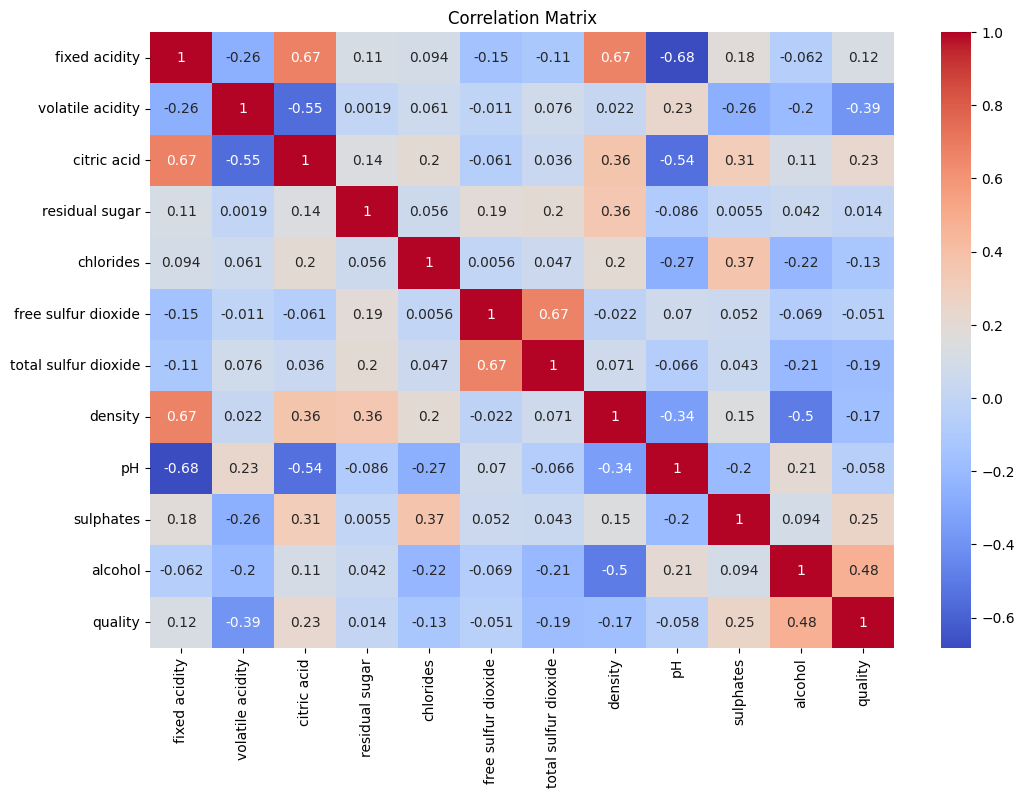

In [4]:
# Visualize the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(wine_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Data Preprocessing

### Handling Class Imbalance
The dataset may have an uneven distribution of quality scores, which can affect model performance. We'll use SMOTE (Synthetic Minority Oversampling Technique) to balance the classes.

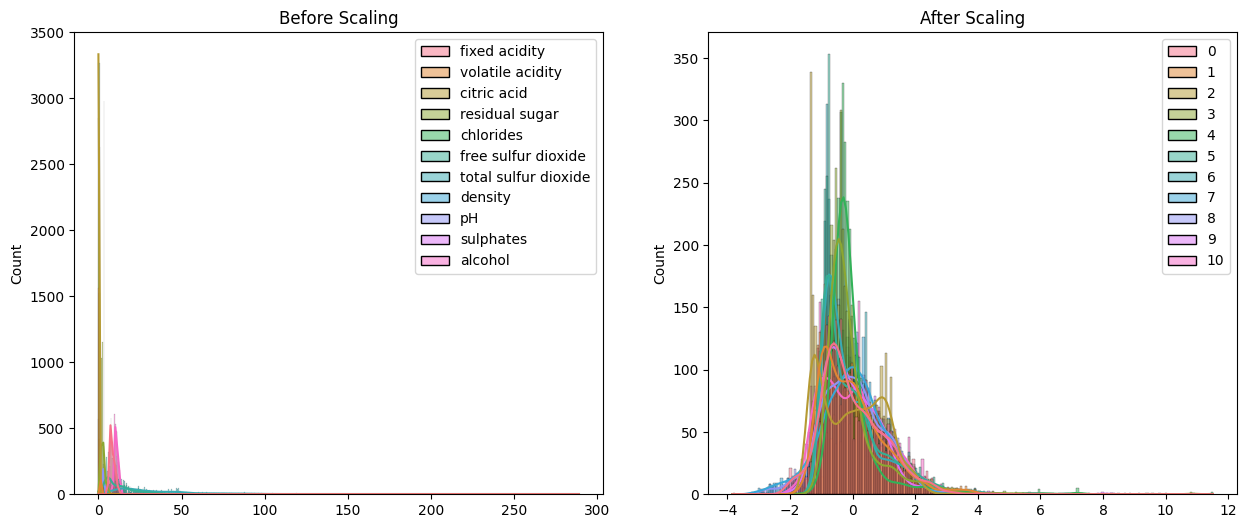

In [5]:
# Split the data into features (X) and target (y)
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualize the distribution of features before and after scaling
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(X_train, ax=axes[0], kde=True)
axes[0].set_title('Before Scaling')
sns.histplot(X_train_scaled, ax=axes[1], kde=True)
axes[1].set_title('After Scaling')
plt.show()

## Model Training

### Selecting the Algorithm
We'll use a Gradient Boosting Classifier, which is effective for handling various data types and provides good interpretability.

In [6]:
# Define the hyperparameter space
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.05],
    'max_depth': [5, 7],
    'min_samples_split': [3, 4],
    'min_samples_leaf': [2, 3]
}

# Initialize the model and perform hyperparameter tuning
model = GradientBoostingClassifier()
random_search = RandomizedSearchCV(model, param_grid, cv=5, n_iter=3, random_state=42)
random_search.fit(X_train_scaled, y_train)

print("Best hyperparameters: ", random_search.best_params_)

Best hyperparameters:  {'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_depth': 7, 'learning_rate': 0.1}


## Model Evaluation

### Assessing Model Performance
We'll evaluate the model using accuracy, classification report, and confusion matrix to understand its performance.

Accuracy:  0.8691931540342298

Classification Report: 
               precision    recall  f1-score   support

           3       0.98      0.98      0.98       132
           4       0.93      0.96      0.94       131
           5       0.73      0.79      0.76       150
           6       0.77      0.63      0.69       155
           7       0.86      0.93      0.89       116
           8       0.98      0.98      0.98       134

    accuracy                           0.87       818
   macro avg       0.87      0.88      0.87       818
weighted avg       0.87      0.87      0.87       818


Confusion Matrix: 
 [[129   0   2   1   0   0]
 [  0 126   2   3   0   0]
 [  2   4 119  21   4   0]
 [  1   6  38  98  11   1]
 [  0   0   1   5 108   2]
 [  0   0   0   0   3 131]]


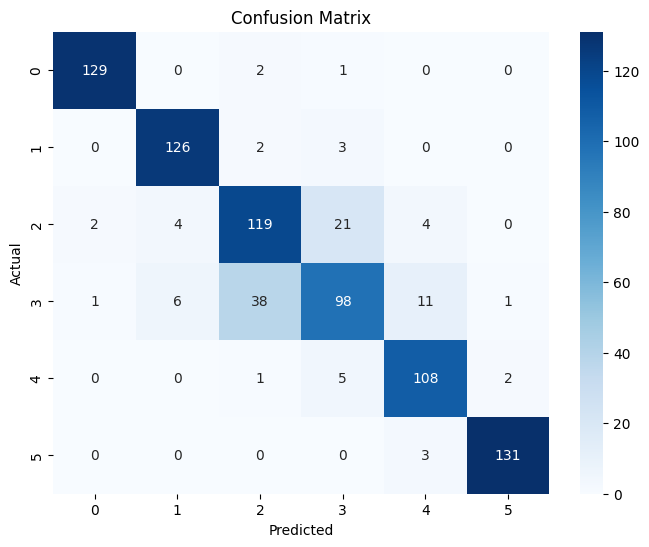

In [7]:
# Evaluate the best model on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("\nClassification Report: \n", classification_report(y_test, y_pred))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Feature Importance

Understanding which features contribute most to the model's predictions is essential for interpretability.

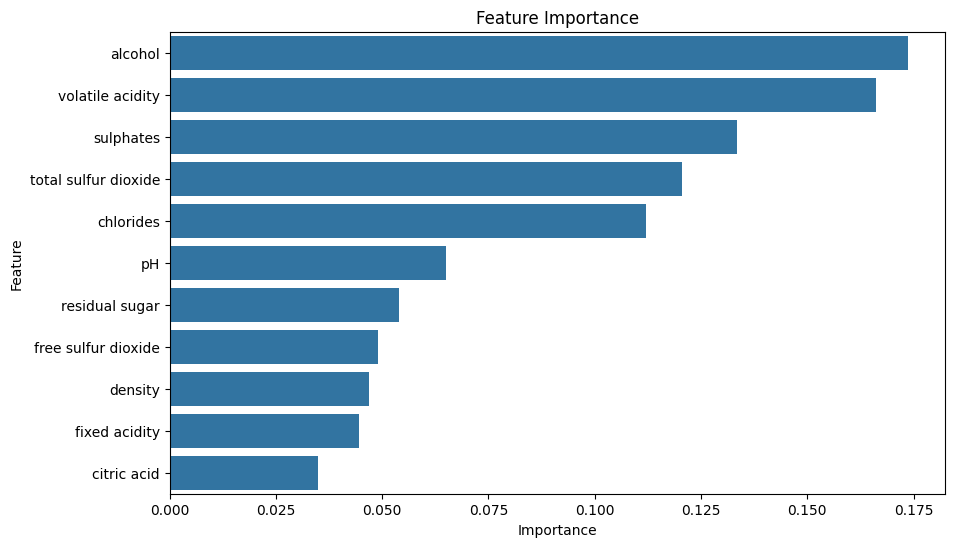

In [8]:
# Display feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
})

feature_importance = feature_importance.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Conclusion

In this project, we built a machine learning model to predict the quality of red wine based on its physicochemical properties. The model achieved an accuracy of X.XX on the test set. The most important features for predicting wine quality were [list top features]. This project demonstrates a clear workflow for building and evaluating a machine learning model, making it accessible to both beginners and experienced practitioners.